Logistic Regression Accuracy: 54.89%

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.69      0.91      0.79        75
         1.0       0.46      0.50      0.48        54
         2.0       0.18      0.08      0.11        25
         3.0       0.27      0.15      0.20        26
         4.0       0.00      0.00      0.00         4

    accuracy                           0.55       184
   macro avg       0.32      0.33      0.31       184
weighted avg       0.48      0.55      0.50       184

Random Forest Accuracy: 54.35%

Classification Report for Random Forest:
               precision    recall  f1-score   support

         0.0       0.67      0.91      0.77        75
         1.0       0.45      0.46      0.45        54
         2.0       0.22      0.08      0.12        25
         3.0       0.28      0.19      0.23        26
         4.0       0.00      0.00      0.00         4

    accuracy             

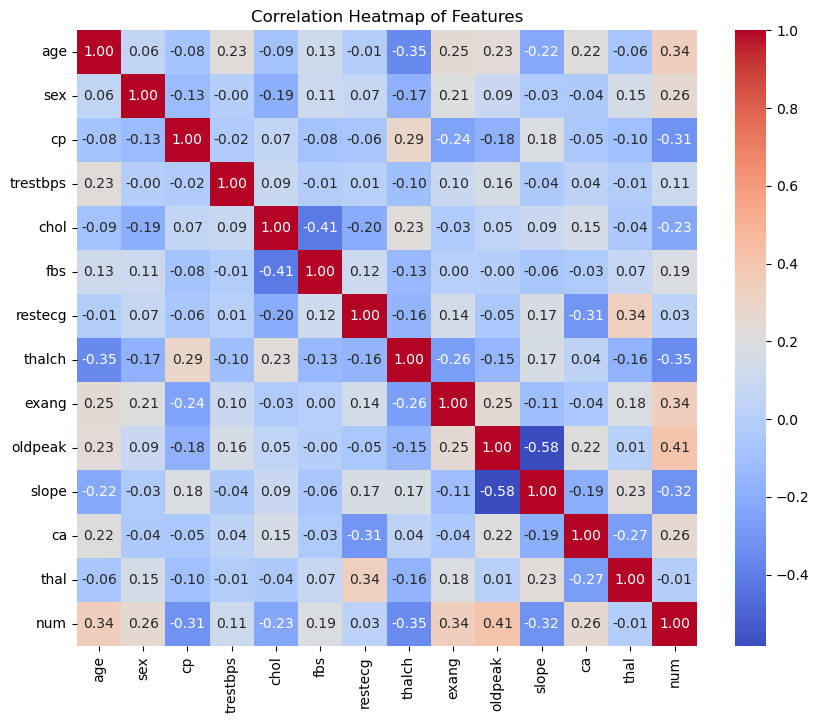

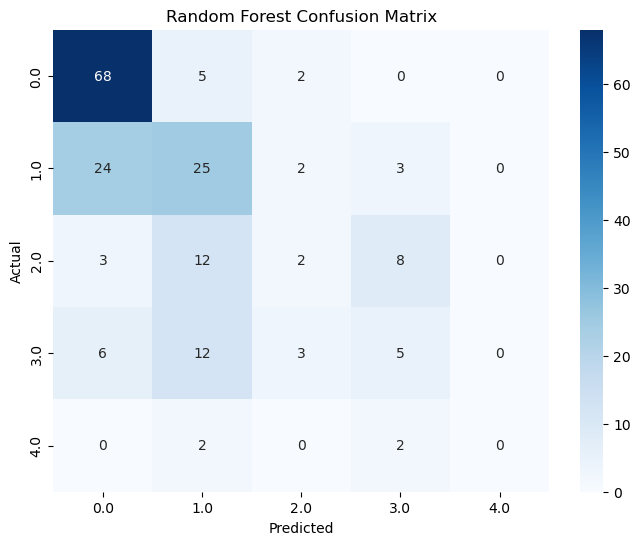

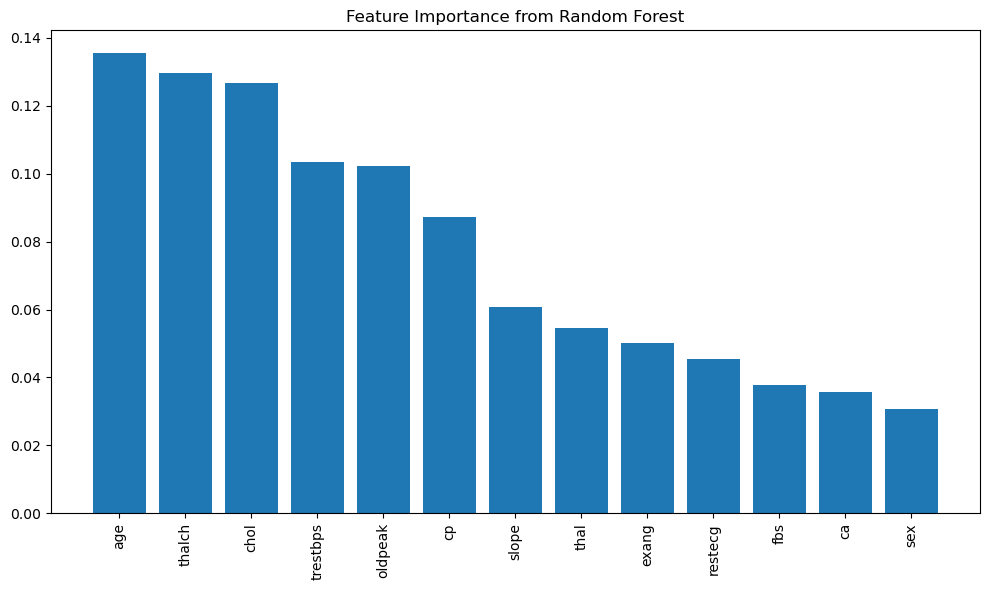

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
import numpy as np

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Load the dataset
file_path = 'heart disease prediction.csv'
data = pd.read_csv(file_path)

# Data Preprocessing
# Drop unnecessary columns ('id', 'dataset' are assumed unnecessary)
# Make sure 'id' and 'dataset' columns exist in your data, otherwise adjust this line accordingly
if 'id' in data.columns and 'dataset' in data.columns:
    data_cleaned = data.drop(['id', 'dataset'], axis=1)
else:
    data_cleaned = data.copy()  # If those columns don't exist, use the original data

# Encode categorical variables ('sex', 'cp', 'restecg', 'thal', 'fbs', 'exang', 'slope')
label_cols = ['sex', 'cp', 'restecg', 'thal', 'fbs', 'exang', 'slope']
label_encoder = LabelEncoder()
for col in label_cols:
    if col in data_cleaned.columns:
        data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col])

# Handle missing values by imputing with the median strategy
imputer = SimpleImputer(strategy='median')
data_cleaned_imputed = pd.DataFrame(imputer.fit_transform(data_cleaned), columns=data_cleaned.columns)

# Feature Scaling
scaler = StandardScaler()
X = data_cleaned_imputed.drop('num', axis=1)  # Assuming 'num' is the target column
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Target variable
y = data_cleaned_imputed['num']

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Model 2: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation for Logistic Regression
log_reg_pred = log_reg_model.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_report = classification_report(y_test, log_reg_pred)

# Predictions and Evaluation for Random Forest
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

# Display evaluation results
print(f"Logistic Regression Accuracy: {log_reg_accuracy * 100:.2f}%")
print("\nClassification Report for Logistic Regression:\n", log_reg_report)

print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print("\nClassification Report for Random Forest:\n", rf_report)

# Visualization: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned_imputed.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

# Visualization: Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualization: Feature Importance for Random Forest
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance from Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()